In [91]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [92]:
data = pd.read_csv("Housing.csv")
print(data)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [93]:
price = data['price'].values.reshape(-1,1)

In [94]:
facility_data = data.iloc[:, 1:].to_numpy()
facility_data = np.where(facility_data == 'yes', 1, facility_data)
facility_data = np.where(facility_data == 'no', 0, facility_data)
facility_data = np.where(facility_data == 'furnished', 2, facility_data)
facility_data = np.where(facility_data == 'semi-furnished', 1, facility_data)
facility_data = np.where(facility_data == 'unfurnished', 0, facility_data)

In [95]:
X_train, X_temp, y_train, y_temp = train_test_split(facility_data, price, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
iters = 1000
rate = 0.01

In [97]:
model = MLPRegressor(hidden_layer_sizes=(512,),max_iter=iters,learning_rate_init=rate,activation='relu',solver='adam',verbose=True,batch_size=16)
history = model.fit(X_train,y_train)

Iteration 1, loss = 12910952040402.11328125
Iteration 2, loss = 12910354522769.09375000
Iteration 3, loss = 12908659800068.82617188
Iteration 4, loss = 12905378655061.07031250
Iteration 5, loss = 12900381766391.53515625
Iteration 6, loss = 12893521266684.51953125
Iteration 7, loss = 12884869921903.80664062
Iteration 8, loss = 12874260146718.58593750
Iteration 9, loss = 12862112728811.61328125
Iteration 10, loss = 12847828045142.25000000
Iteration 11, loss = 12832211668978.60546875
Iteration 12, loss = 12814437992000.08203125


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 13, loss = 12795564835331.82226562
Iteration 14, loss = 12774500501125.69531250
Iteration 15, loss = 12752666130180.73242188
Iteration 16, loss = 12728093091143.15820312
Iteration 17, loss = 12702924870283.96679688
Iteration 18, loss = 12675652384472.34179688
Iteration 19, loss = 12646456877365.10742188
Iteration 20, loss = 12616759583562.54296875
Iteration 21, loss = 12584223621078.48046875
Iteration 22, loss = 12552072443711.91406250
Iteration 23, loss = 12517138515993.38671875
Iteration 24, loss = 12481432665052.51757812
Iteration 25, loss = 12444064631936.70312500
Iteration 26, loss = 12405645102338.94531250
Iteration 27, loss = 12366229348027.94531250
Iteration 28, loss = 12324709577435.47265625
Iteration 29, loss = 12282447686486.54687500
Iteration 30, loss = 12238869587321.02343750
Iteration 31, loss = 12193462817653.32226562
Iteration 32, loss = 12147775126971.26757812
Iteration 33, loss = 12099821851450.39843750
Iteration 34, loss = 12052231342533.42578125
Iteration 

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


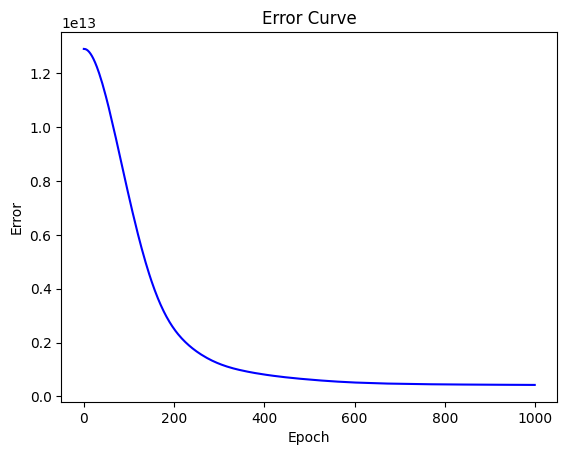

In [98]:
import matplotlib.pyplot as plt
plt.plot(history.loss_curve_, alpha=1.0, color='blue')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error Curve')
plt.show()

In [99]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    return np.mean((y - y_pred) ** 2)

In [100]:
mse_train = evaluate_model(model, X_train, y_train)
print(f'Training MSE: {mse_train:.4f}')

mse_test = evaluate_model(model, X_test, y_test)
print(f'Test MSE: {mse_test:.4f}')

Training MSE: 5385314328333.5332
Test MSE: 7053004869976.5889


In [101]:
y_test_pred = model.predict(X_test)

In [102]:
pltYTestPred = []
pltYTest = []
testChange = []

In [103]:
for i in range(len(y_test_pred)):
  pltYTestPred.append(y_test_pred[i])
  pltYTest.append(y_test[i][0])
  testChange.append(y_test_pred[i] - y_test[i][0])

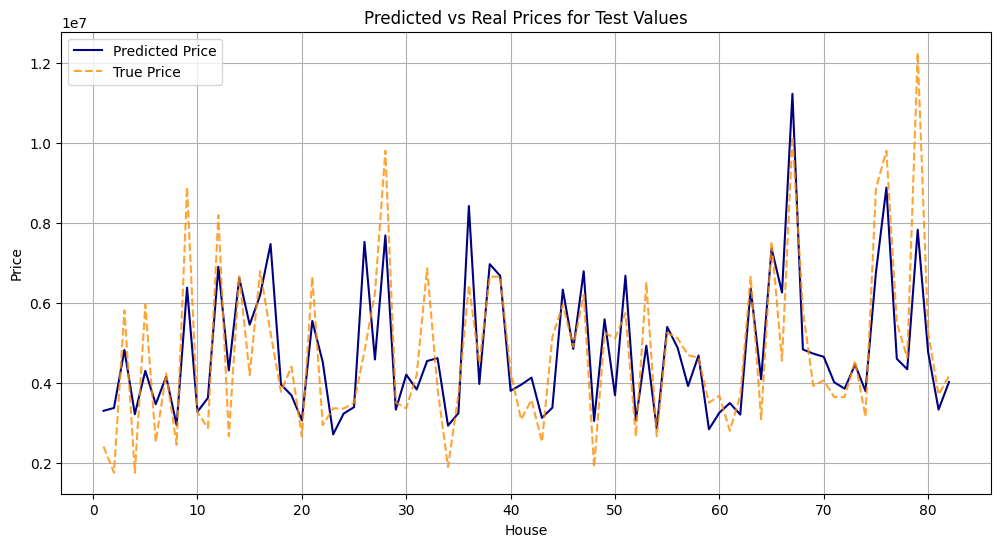

In [104]:
plt.figure(figsize=(12, 6))
plt.title("Predicted vs Real Prices for Test Values")
plt.xlabel("House")
plt.ylabel("Price")
testRange = range(1, len(pltYTestPred)+1)
plt.plot(testRange, pltYTestPred, label="Predicted Price", color="navy")

plt.plot(testRange, pltYTest, label="True Price",
             color="darkorange", linestyle="--", alpha=0.8)

plt.legend(loc="best")
plt.grid(True)
plt.show()

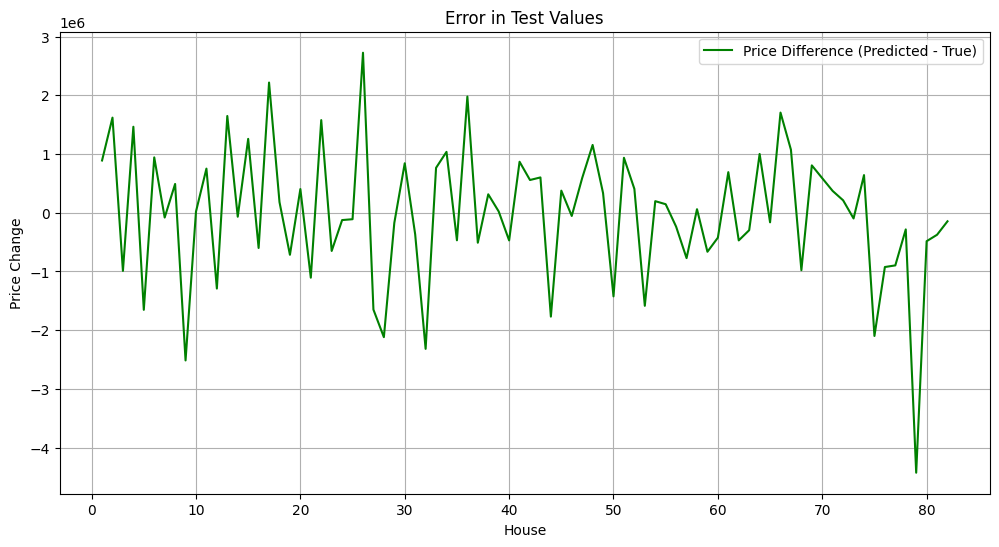

In [105]:
plt.figure(figsize=(12, 6))
plt.title("Error in Test Values")
plt.xlabel("House")
plt.ylabel("Price Change")

plt.plot(testRange, testChange, label="Price Difference (Predicted - True)",
             color="green")

plt.legend(loc="best")
plt.grid(True)
plt.show()